<a href="https://colab.research.google.com/github/620593/ML/blob/main/polynomialregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

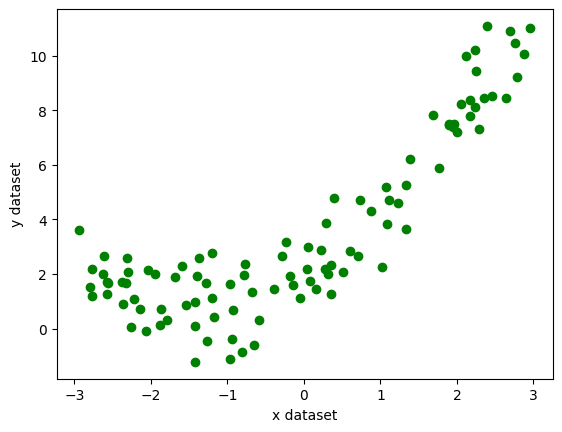

In [6]:
x= 6 *  np.random.rand(100,1)-3
y= 0.5 * x**2 + 1.5* x +2+np.random.randn(100,1)

#quadratic equation used - y = 0.5x^2+1.5x+2+outliers
plt.scatter(x,y,color='green')
plt.xlabel('x dataset')
plt.ylabel('y dataset')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
##lets implement simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.6993916158392577

Text(0, 0.5, 'y dataset')

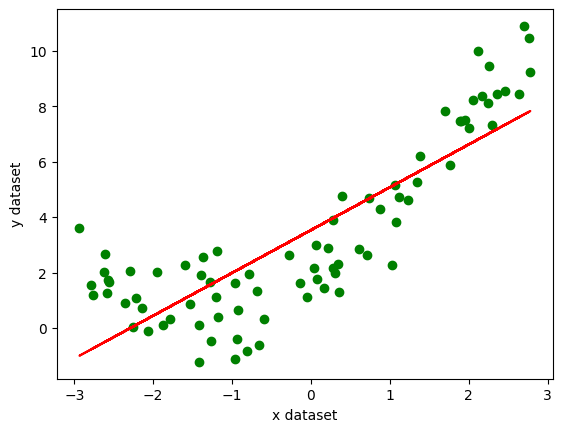

In [15]:
## lets visualize the model
plt.plot(x_train,lr.predict(x_train),color='r')
plt.scatter(x_train,y_train,color='green')
plt.xlabel('x dataset')
plt.ylabel('y dataset')

In [16]:
#let's apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)



In [17]:
x_train_poly

array([[ 1.00000000e+00,  7.56591044e-02,  5.72430008e-03],
       [ 1.00000000e+00,  1.38094044e+00,  1.90699649e+00],
       [ 1.00000000e+00,  1.02564053e+00,  1.05193849e+00],
       [ 1.00000000e+00, -6.57856746e-01,  4.32775498e-01],
       [ 1.00000000e+00, -2.58099079e+00,  6.66151348e+00],
       [ 1.00000000e+00, -1.39172875e+00,  1.93690891e+00],
       [ 1.00000000e+00, -1.17804464e+00,  1.38778917e+00],
       [ 1.00000000e+00,  4.11634436e-02,  1.69442909e-03],
       [ 1.00000000e+00,  2.11400848e+00,  4.46903187e+00],
       [ 1.00000000e+00, -2.76840780e+00,  7.66408173e+00],
       [ 1.00000000e+00,  7.39140633e-01,  5.46328875e-01],
       [ 1.00000000e+00, -1.94931735e+00,  3.79983813e+00],
       [ 1.00000000e+00,  1.08237575e+00,  1.17153726e+00],
       [ 1.00000000e+00,  2.25140565e+00,  5.06882740e+00],
       [ 1.00000000e+00, -1.59436827e+00,  2.54201019e+00],
       [ 1.00000000e+00, -2.25455028e+00,  5.08299698e+00],
       [ 1.00000000e+00,  2.84815072e-01

In [19]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9172935282595938


In [21]:
regression.coef_

array([[0.        , 1.5999749 , 0.56070253]])

In [24]:
regression.intercept_

array([1.93960481])

Text(0, 0.5, 'y dataset')

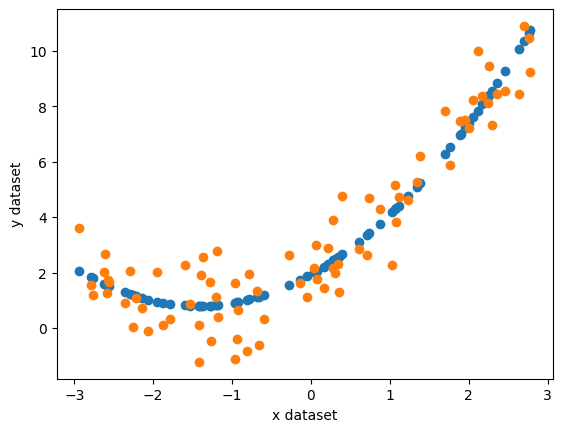

In [27]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)
plt.xlabel('x dataset')
plt.ylabel('y dataset')

In [28]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

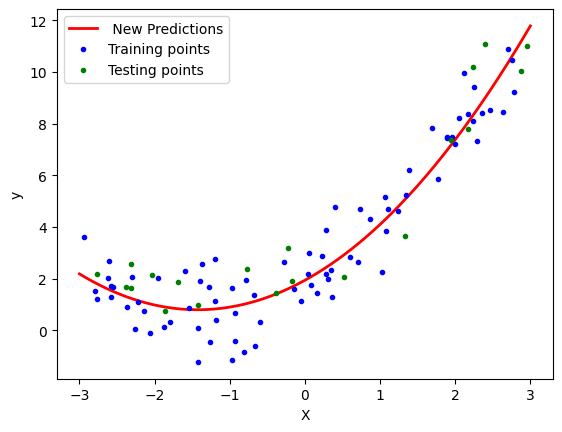

In [30]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Pipeline Concepts

In [31]:
from sklearn.pipeline import Pipeline

In [36]:

def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

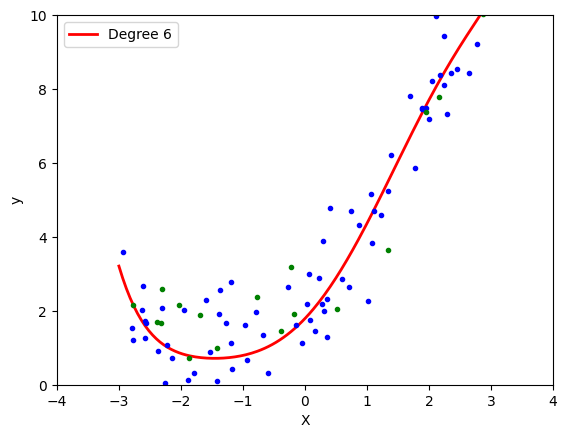

In [37]:
poly_regression(6)